In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pylab as pl
%matplotlib inline

In [164]:
data = pd.read_csv('C:/Users/lenovo_pc/Desktop/NoteBooks_and_Datasets/Mall_Customers.csv')

# data pre-processing

In [165]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [166]:
data = data.drop(['CustomerID'],axis=1)


In [167]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [169]:
data = pd.get_dummies(data=data,columns=['Genre'],drop_first=True)

In [170]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


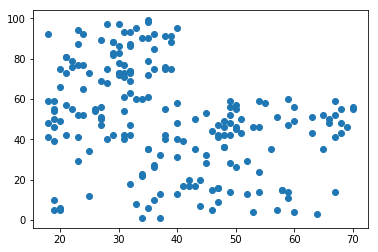

In [154]:
plt.scatter(data.iloc[:,0],data.iloc[:,2]) # plotting any two features with each others to see the variances in the data 

# MinMaxScaler (gives the best accuracy)

In [171]:
from sklearn.preprocessing import MinMaxScaler
X_s = MinMaxScaler()
data = X_s.fit_transform(data)

c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Hierarchical Clustring 

In [172]:
from sklearn import cluster
clust = cluster.AgglomerativeClustering(n_clusters=2,linkage='ward')
labels = clust.fit_predict(data)

In [173]:
data = pd.DataFrame(data)

In [174]:
from sklearn.metrics import silhouette_score

In [175]:
silhouette_score(data,labels)

0.5194624832665107

Text(0, 0.5, 'Spending Score')

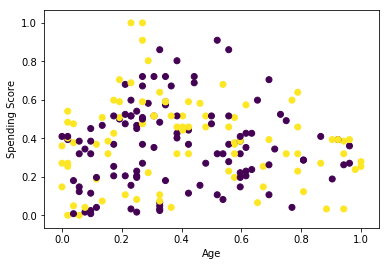

In [213]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=labels)
plt.xlabel('Age')
plt.ylabel('Spending Score')

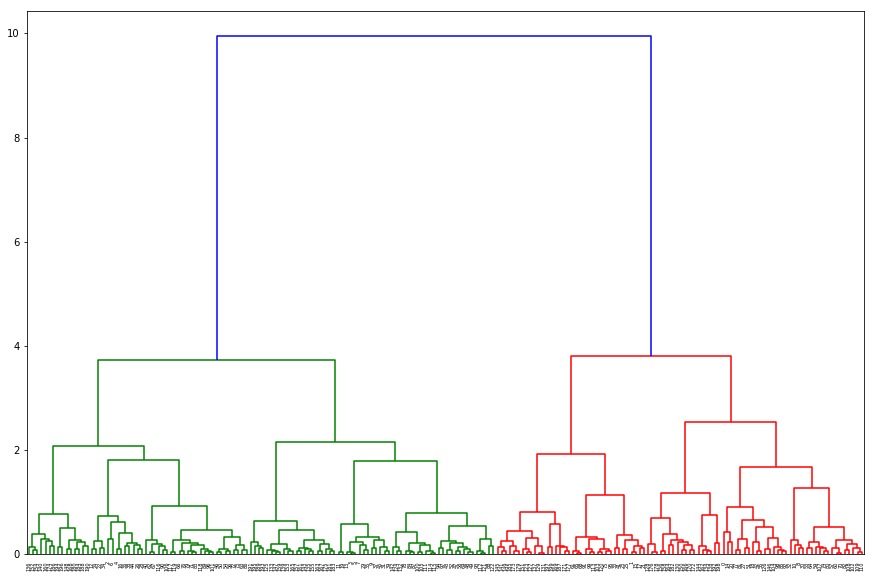

In [207]:
from scipy.cluster.hierarchy import dendrogram , ward,single
linkage = ward(data)
plt.figure(figsize=(15,10))
dendrogram(linkage)

plt.show()

# The Famous Kmeans clustering

In [208]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=2)
labels = km.fit_predict(data)

In [209]:
silhouette_score(data,labels)

0.5194624832665107

Text(0, 0.5, 'Spending Score')

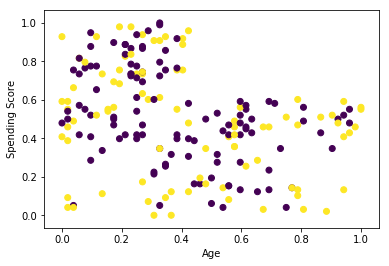

In [212]:
plt.scatter(data.iloc[:,0],data.iloc[:,2],c=labels)
plt.xlabel('Age')
plt.ylabel('Spending Score')

# DBScan based Clustering

In [135]:
sp = cluster.SpectralClustering(n_clusters=2)
labels = sp.fit_predict(data)

In [136]:
silhouette_score(data,labels)

0.5194624832665107

Text(0, 0.5, 'Spending Score')

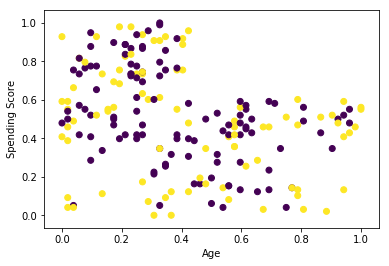

In [211]:
plt.scatter(data.iloc[:,0],data.iloc[:,2],c=labels)
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [138]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(data)
clusts = gmm.predict(data)

In [139]:
silhouette_score(data,clusts)

0.5194624832665107

Text(0, 0.5, 'Spending Score')

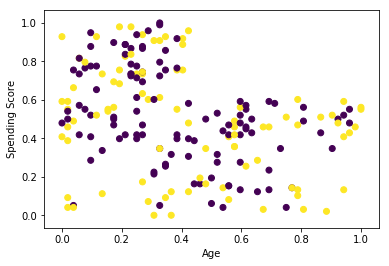

In [214]:
plt.scatter(data.iloc[:,0],data.iloc[:,2],c=clusts)
plt.xlabel('Age')
plt.ylabel('Spending Score')